#### Authors: Massimo Stefani, Eva Ray 

## Data Management - Labo 5

### Exercise 4 - Image compressing with KMeans

In this exercise, you will understand how to compress an image using `KMeans` and understand how RGB images are stored in your computer.

We use the images in the folder `img`. A sample of pictures are given but feel free to add more.
The base of the code is given with the imports and the loading of all `PNG` and `JPG` images. If you want to test with different pictures change the `SELECT_IMG_IDX` variable.

In [75]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from tqdm import tqdm

In [76]:
FOLDER_IMAGES = 'data/img'
SELECT_IMG_IDX = 3

path_images = glob.glob(f'{FOLDER_IMAGES}/*.jpg') + glob.glob(f'{FOLDER_IMAGES}/*.png')
path = path_images[SELECT_IMG_IDX]

print(f'Path using index {SELECT_IMG_IDX} : {path}')

Path using index 3 : data/img\cheseaux.png


In [77]:
def load_img(path):
    img = plt.imread(path)
    return img

def plot_img(img, ax = None):
    _, ax = plt.subplots() if ax is None else (None, ax)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

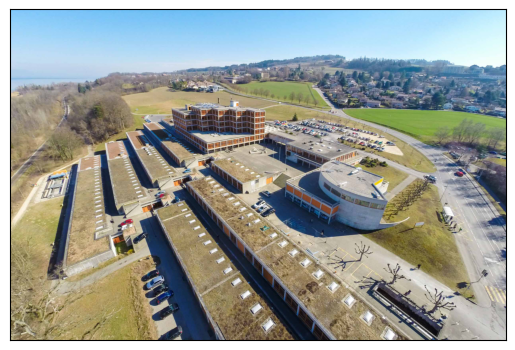

In [78]:
img = load_img(path)

plot_img(img)

In [79]:
h, w, d = img.shape
dtype = img.dtype
print(dtype, h, w, d)

float32 1667 2500 3


<p style='color:red;font-weight:bold'>Exercise 4.1 - Question : </p>

Explain the 4 variables defined in the cell above (`dtype`, `h`, `w`, `d`). Why is this type with these dimensions used ? Do you find any differences when trying with other images ? If so, which are the differences and why is there some ?

The 4 variables are:
- `dtype`: This variable represents the data type of the image array (e.g., `uint8` , `float32`, etc.).
- `h`: This variable represents the height of the image in pixels.
- `w`: This variable represents the width of the image in pixels.
- `d`: This variable represents the depth of the image, which corresponds to the number of color channels (e.g., 3 for RGB images).

Yes, there are differences when trying with other images. The height and width can vary depending on the resolution of the image. The depth can also vary if the image is grayscale (depth of 1) or has an alpha channel (depth of 4 for RGBA images). The data type may differ based on how the image was saved or processed.

<p style='color:red;font-weight:bold'>Exercise 4.2 : </p>

Fill the function `plot_rgb_3d` to plot all the pixels in axis `R-G-B`. The colors in the plot need to represent the true color from the pixel image. 

In [80]:
def plot_rgb_3d(img):
    # Obtain all pixels
    pixels = img.reshape(-1, 3)
    # select the 3 channels
    r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]  

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Fill the scatter function parameters 
    # Advice : Use `s=0.1` to have smaller marker points.
    # Hint : Check in case of different types !

    # Normalize colors based on dtype
    if img.dtype == np.uint8:
        colors = pixels / 255.0
    elif img.dtype in [np.float32, np.float64]:
        colors = pixels
    else:
        # Fallback: normalize to [0, 1]
        colors = (pixels - pixels.min()) / (pixels.max() - pixels.min())
    
    ax.scatter(r, g, b, c=colors, s=0.1)
    ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')

    plt.show()

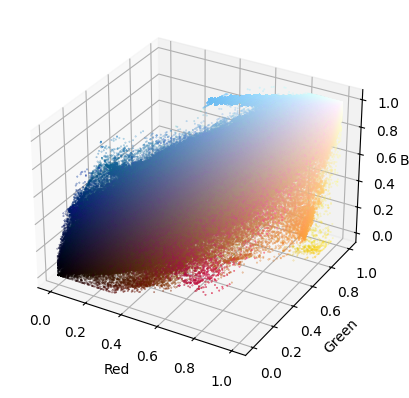

In [66]:
plot_rgb_3d(img)

<p style='color:red;font-weight:bold'>Exercise 4.3 : </p>

Fill the function `compress_image` to use `KMeans` algorithm to compress the image. 

In [67]:
def compress_image(img, N):
    dtype = img.dtype
    h,w,d = img.shape

    # Initiate model KMeans
    model = KMeans(n_clusters=N, random_state=13)
    # Fit model
    model.fit(img.reshape(-1, 3))

    # Next step is using the results of the models to represent the pixels in a compressed way
    # Advice : Check what to do in case of `dtype` = 'uint8'
    # Return the compressed image in the same dimensions and type as original image.

    # Get cluster labels for each pixel (which cluster it belongs to)
    labels = model.labels_
    
    # Get the cluster centers (the N representative colors)
    centers = model.cluster_centers_
    
    # Replace each pixel with its cluster center color
    img_compressed = centers[labels]
    
    # Reshape back to original image dimensions
    img_compressed = img_compressed.reshape(h, w, d)
    
    # Convert to original dtype if needed
    if dtype == np.uint8:
        # KMeans works with float, so we need to round and convert back to uint8
        img_compressed = np.clip(img_compressed, 0, 255).astype(np.uint8)
    elif dtype in [np.float32, np.float64]:
        # Ensure values are in valid range [0, 1] for float images
        img_compressed = np.clip(img_compressed, 0, 1).astype(dtype)

    return img_compressed

<p style='color:red;font-weight:bold'>Exercise 4.4 : </p>

Explain why the algorithm `KMeans` works to compress an image and what it does ? (In other terms, how does it find the colors to use and how to assign them ?)

KMeans is a clustering algorithm that groups similar data points together based on their features. In the context of image compression, KMeans works by identifying clusters of similar colors in the image. It does this by iteratively assigning each pixel to the nearest cluster center (representing a color) and then updating the cluster centers based on the mean of the assigned pixels. This process continues until convergence, resulting in a reduced set of colors that can effectively represent the original image. By replacing each pixel with the color of its assigned cluster center, we achieve compression while maintaining a visually similar appearance to the original image.

<p style='color:red;font-weight:bold'>Exercise 4.5 : </p>

Execute the following cell and explain what does the `assert` function checks. What could you do if the assertion fails ?

In [68]:
img_compressed = compress_image(img, 4)

assert not (
    ((img_compressed > 255).any() or (img_compressed < 0).any()) 
    if img_compressed.dtype == 'uint8' else 
    ((img_compressed > 1).any() or (img_compressed < 0).any())
    )

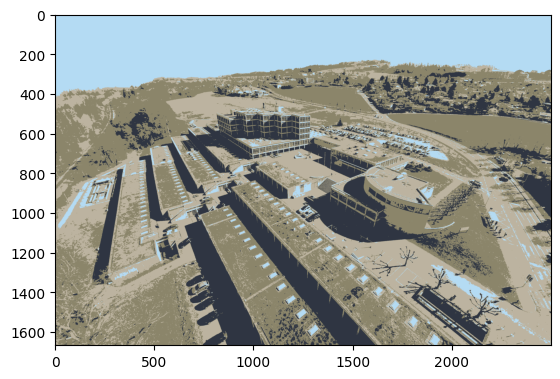

In [69]:
plt.imshow(img_compressed)

The assert function checks that the compressed image has valid pixel values based on its data type. If the data type is `uint8`, it ensures that all pixel values are between 0 and 255. If the data type is `float32` or `float64`, it checks that all pixel values are between 0.0 and 1.0. If the assertion fails, it indicates that there are pixel values outside the expected range, which could lead to incorrect image representation. To address this, we could normalize or clip the pixel values (= forcibly keeping them within the valid range) to ensure they fall within the valid range for the given data type.

<p style='color:red;font-weight:bold'>Exercise 4.6 : </p>

Explain what happened in the following plot for the pixel colors.

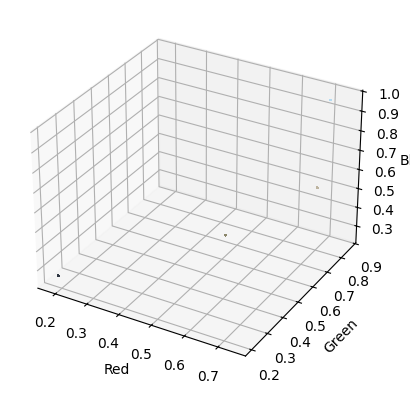

In [70]:
plot_rgb_3d(img_compressed)

The colors of the orginal images gave been reduced to a limited number of colors. This number corresponds to the number of clusters used in the KMeans algorithm, here 4. On the 3D plot, we can see that the pixels are grouped around 4 main colors, which are the centroids of the clusters formed by KMeans. Each pixel in the compressed image is assigned to the nearest centroid color, resulting in a simplified color palette that still captures the overall appearance of the original image.

<p style='color:red;font-weight:bold'>Exercise 4.7 : </p>

Fill the code to save all the pictures in a compressed folder, and then explain why does the size of the pictures havent changed much in some cases.

Modify the code for ploting the comparison on **the same plot** with both: original and compressed images. Do not divide original/compressed but alternate between them following these scheme (for 4 images):

```
    Original   Compressed
 ___________________________ 
|            |              |
|   original | compressed   |
|____________|______________|
|            |              |
|   original | compressed   |
|____________|______________|
            ...
```

In [71]:
COMPRESSED_FOLDER = 'data/img/compressed'
N_CLUSTERS = 4

for path in tqdm(path_images, desc='Compressing picture'):
    # Load the image and compress it
    img = load_img(path)

    # Compress it using KMeans
    img_compressed = compress_image(img, N_CLUSTERS)

    # Extract filename from path (works for both / and \)
    filename = path.replace('\\', '/').split('/')[-1]
    
    # Create compressed path
    compressed_path = f'{COMPRESSED_FOLDER}/{filename}'
    
    # Convert to uint8 if needed (PIL apparently requires uint8 for saving)
    if img_compressed.dtype in [np.float32, np.float64]:
        img_to_save = (img_compressed * 255).astype(np.uint8)
    else:
        img_to_save = img_compressed
    
    # Save using Image.fromarray
    Image.fromarray(img_to_save).save(compressed_path)

Compressing picture: 100%|██████████| 6/6 [00:13<00:00,  2.30s/it]


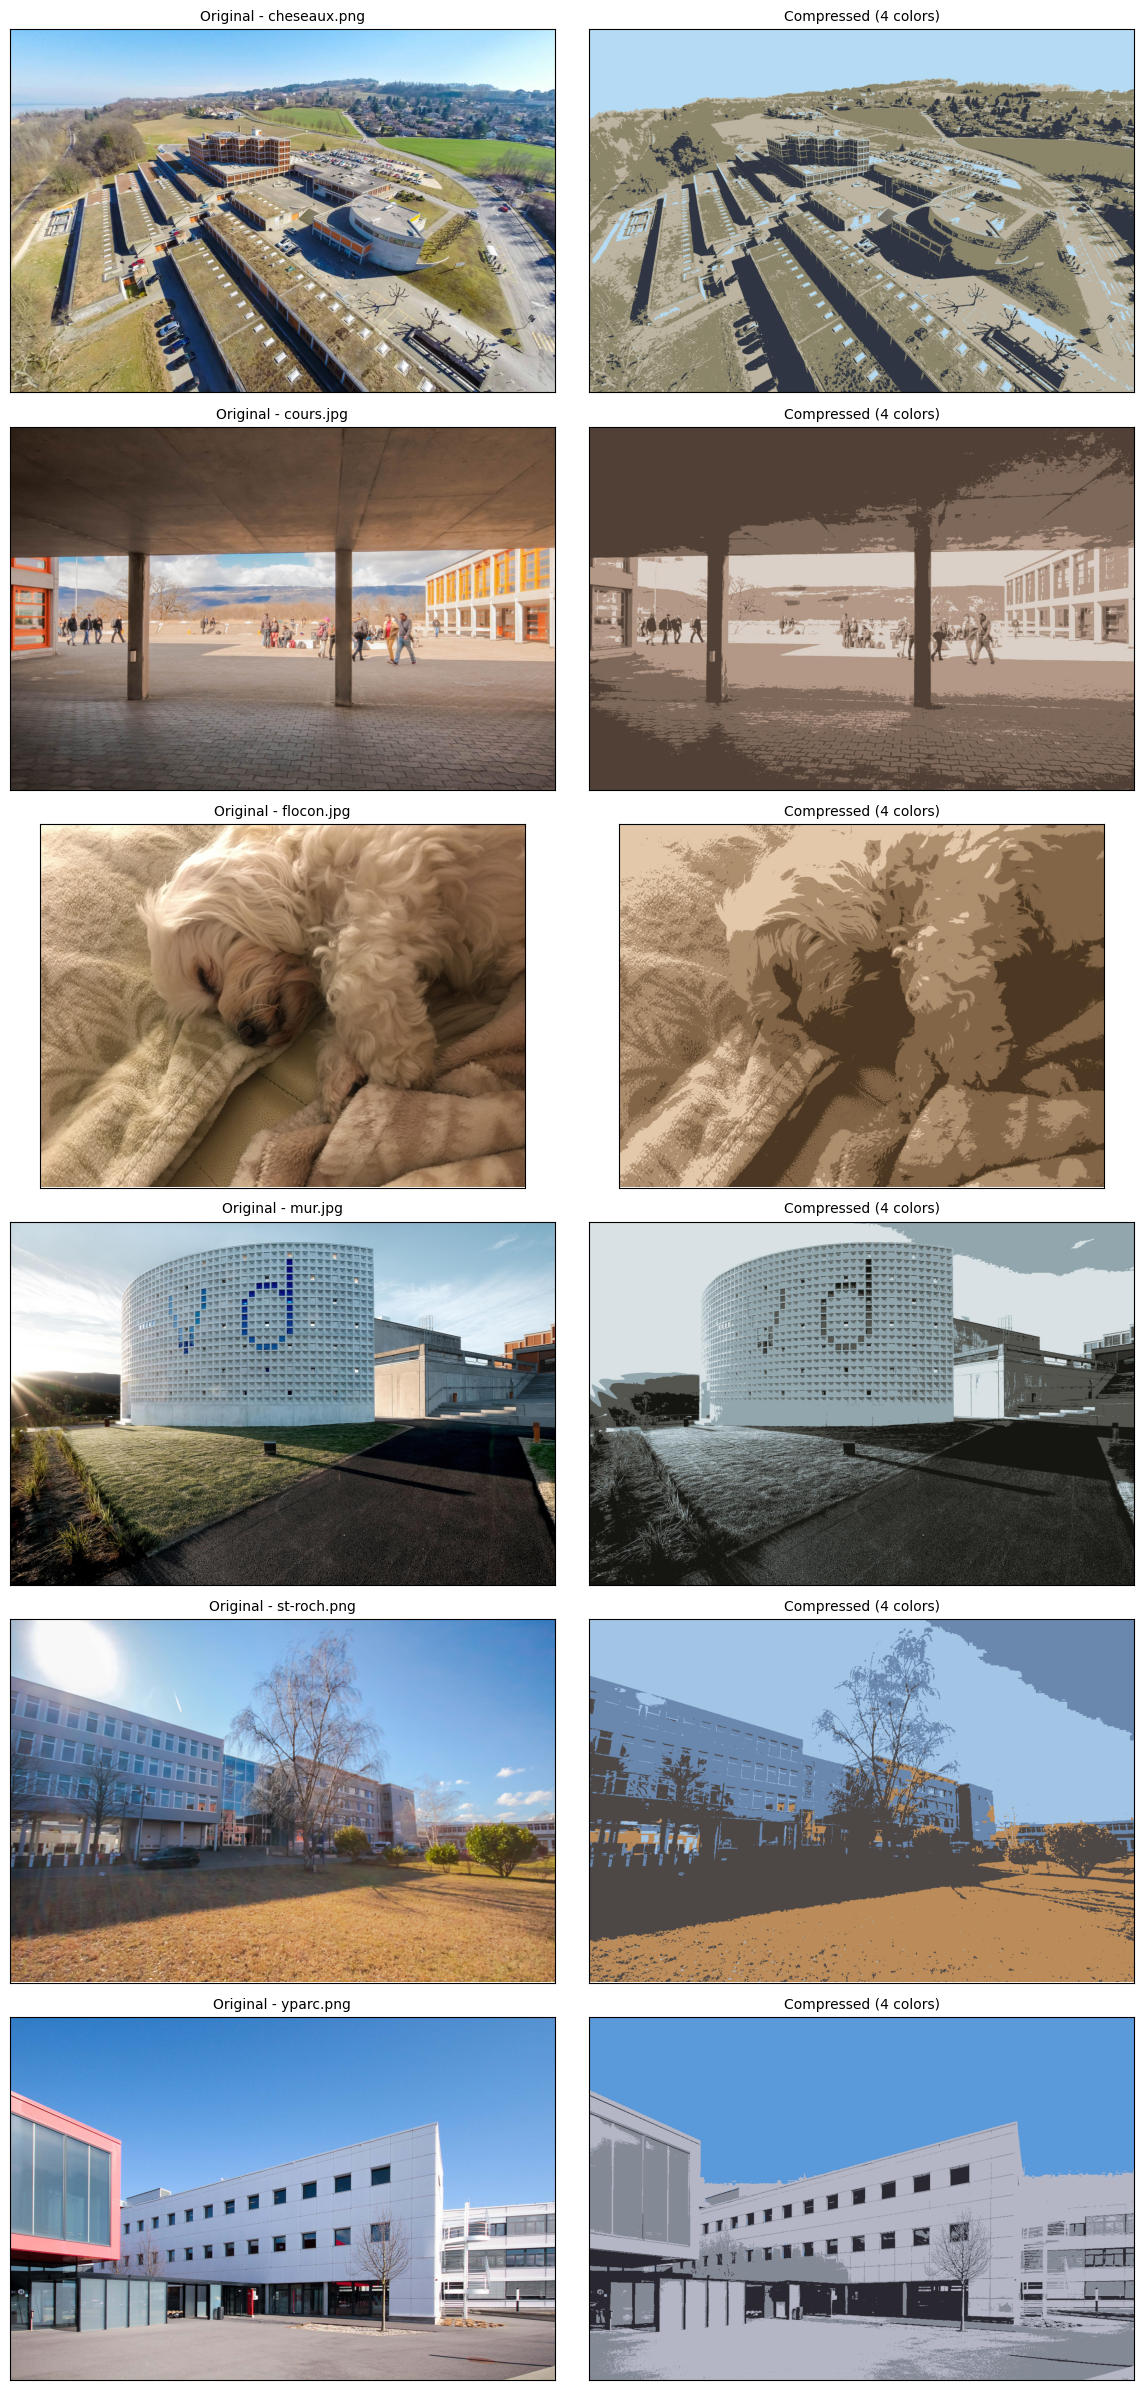

In [72]:
# Plot pictures alternating: original | compressed
# Each row has 2 columns (original left, compressed right)
fig, axs = plt.subplots(
    nrows=len(path_images),
    ncols=2,
    figsize=(12, 4 * len(path_images))
)

# Handle case of single image
if len(path_images) == 1:
    axs = axs.reshape(1, -1)

# Get compressed paths (sorted to match with originals)
paths_compressed = sorted(glob.glob(f"{COMPRESSED_FOLDER}/*.jpg") + 
                         glob.glob(f"{COMPRESSED_FOLDER}/*.png"))

# Plot each image pair
for i in range(len(path_images)):
    # Left: Original
    img_orig = load_img(sorted(path_images)[i])
    plot_img(img_orig, ax=axs[i, 0])
    filename_orig = sorted(path_images)[i].replace('\\', '/').split('/')[-1]
    axs[i, 0].set_title(f'Original - {filename_orig}', fontsize=10)
    
    # Right: Compressed
    img_comp = load_img(paths_compressed[i])
    plot_img(img_comp, ax=axs[i, 1])
    axs[i, 1].set_title(f'Compressed ({N_CLUSTERS} colors)', fontsize=10)

fig.tight_layout()
plt.show()

The file size of the pictures may not have changed much in some cases because the compression method used (KMeans clustering) reduces the number of unique colors in the image but does not necessarily reduce the overall file size significantly. If the original image already has a limited color palette or if the compression does not significantly reduce the complexity of the image data, the file size may remain relatively unchanged. Additionally, factors such as image format and compression algorithms used by the file format can also influence the final file size.

<p style='color:red;font-weight:bold'>Exercise 4.8 : </p>

Fill the code below to try multiple number of clusters and compute the error (here we chose Mean Squared Error) between the original and the compressed image.

Plots the error and explain which number of clusters (an estimation) is the most optimal and why. **The plot needs to be complete (title, correct ticks..).**

In [73]:
def mse(img1, img2):
    # MSE formula
    return np.mean((img1 - img2) ** 2)

# Use these number of clusters
NN = np.arange(64, 1, -4)

# Storage for averaged errors
errors = np.zeros(len(NN))

# Iterate through each number of clusters
for idx, n in enumerate(tqdm(NN, desc='Testing cluster sizes')):
    # Store errors for all images for this N
    errors_per_image = []
    
    # Test compression on all images
    for path in path_images:
        img = load_img(path)
        img_compressed = compress_image(img, n)
        error = mse(img, img_compressed)
        errors_per_image.append(error)
    
    # Compute average error across all images
    errors[idx] = np.mean(errors_per_image)

print(f"Completed! Tested {len(NN)} different cluster sizes on {len(path_images)} images.")

Testing cluster sizes: 100%|██████████| 16/16 [17:47<00:00, 66.73s/it]

Completed! Tested 16 different cluster sizes on 6 images.


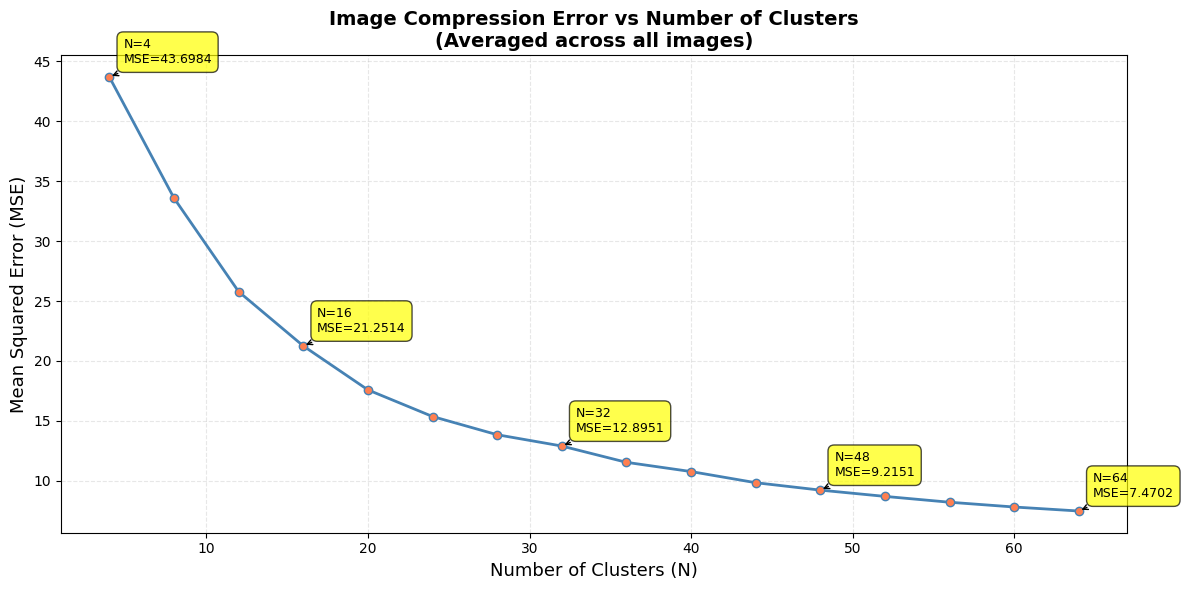


Estimated optimal number of clusters: 64 (elbow point)
At N=64, MSE = 7.470240


In [74]:
# Create the plot for the errors
plt.figure(figsize=(12, 6))
plt.plot(NN, errors, marker='o', linewidth=2, markersize=6, color='steelblue', markerfacecolor='coral')
plt.xlabel('Number of Clusters (N)', fontsize=13)
plt.ylabel('Mean Squared Error (MSE)', fontsize=13)
plt.title('Image Compression Error vs Number of Clusters\n(Averaged across all images)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca()  # Invert x-axis since NN goes from 64 to 2

# Add value annotations for key points
for i in [0, len(NN)//4, len(NN)//2, 3*len(NN)//4, -1]:
    plt.annotate(f'N={NN[i]}\nMSE={errors[i]:.4f}', 
                xy=(NN[i], errors[i]), 
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Print optimal number estimation
elbow_idx = np.argmax(np.diff(np.diff(errors)) > 0)  # Find elbow point
print(f"\nEstimated optimal number of clusters: {NN[elbow_idx]} (elbow point)")
print(f"At N={NN[elbow_idx]}, MSE = {errors[elbow_idx]:.6f}")

The way to estimate the optimal number of clusters is to look for the "elbow point" in the plot of error versus number of clusters. This point represents a balance between reducing the error and keeping the number of clusters manageable. Beyond this point, increasing the number of clusters results in diminishing returns in terms of error reduction, indicating that additional clusters do not significantly improve the representation of the original image.

<p style='color:red;font-weight:bold'>Exercise 4.9 : </p>

Theorically, if you reencode the picture in a new format that only accepts $N$ different colors, what is the formula to know how much space to we win compared to an `uint8` RGB picture ? If $N=16$ what is the result obtained (in %) ? Explain all steps, and detail them in LaTeX (i.e. for Markdown with sign `$`: `$x_1=\frac{10^5}{5}$` &#8594; $x_1=\frac{10^5}{5}$)

*PS : We say "theorically", because the sized of a picture is determined after using compression algorithms.*

*If you have issues for writing LaTeX, you can check [this online equation editor](https://editor.codecogs.com/).*

The formula to know the percentage of space saved is:

$\text{Space Saved (\%)} = \left(100 - \frac{Reencoded Size \times 100}{Original Size}\right)$

Let's assume that P is the number of pixels in the image.       

Original size:

- uint8 is encoded on 8 bits.
- An RGB picture has 3 channels (Red, Green, Blue).
- Therefore, each pixel in an uint8 RGB picture is represented by $8 \times 3 = 24$ bits.
- The original size of the image in bits is: $Original Size = P \times 24$ bits.

Reencoded size:

- The number of bits to encode $N$ colors is given by $\lceil{\log_2(N)}\rceil$.
- Therefore, each pixel in the reencoded image is represented by $\lceil{\log_2(N)}\rceil$ bits
- The reencoded size of the image in bits is: $Reencoded Size = P \times \lceil{\log_2(N)}\rceil$ bits.

Space saved:

$\text{Space Saved (\%)} = \left(100 - \frac{P \times \lceil{\log_2(N)}\rceil \times 100}{P \times 24}\right)$

For N = 16:

$\text{Space Saved (\%)} = \left(100 - \frac{P \times 4 \times 100}{P \times 24}\right) = \left(100 - \frac{400}{24}\right) = 83.33\%$

<p style='color:red;font-weight:bold'>Exercise 4.10 : </p>

Let's retake your formula but suppose that the format can now support any RGB color for any image. What would be the technique used to minimize at best (still with no compressing) the space taken ? And what would be the updated formula ?

*Hint : use a variable $P$ for the number of pixels in the picture in your formula.*

If we don't fix an N number of colors and can support any RGB color for any image, a possible technique to minimize the space taken would be the following:
- Count the number of unique colors in the image, denoted as U.
- Build a color palette that contains only these U unique colors.
- Each pixel in the image is then represented by an index that points to its corresponding color in the palette.

The reencoded size of the image in bits would be as before:

$Reencoded Size = P \times \lceil{\log_2(U)}\rceil$ bits 

The size to store the palette itself would also need to be considered, which would be:

$Palette Size = U \times 24$ bits

Space saved:

$\text{Space Saved (\%)} = \left(100 - \frac{(P \times \lceil{\log_2(U)}\rceil + U \times 24) \times 100}{P \times 24}\right)$

This technique is ideal for images with only a few unique colors compared to the total number of pixels, as it can significantly reduce the amount of data needed to represent the image without losing color information. The color palette does not waste space since it only contains the colors that are actually used in the image. Finally, since all the original colors are preserved in the palette, there is no loss of color information, compared to the previous technique.